**1. Load the (CKD) Dataset from GitHub**




In [7]:
import pandas as pd #Data Manioulation

url = 'https://raw.githubusercontent.com/Foyjul-Islam-Raju/Chronic-Kidney-Disease/main/ckd.csv'
df = pd.read_csv(url)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


**2. Count records of attribute**

In [8]:
df.count()

id                400
age               391
bp                388
sg                353
al                354
su                351
rbc               248
pc                335
pcc               396
ba                396
bgr               356
bu                381
sc                383
sod               313
pot               312
hemo              348
pcv               330
wc                295
rc                270
htn               398
dm                398
cad               398
appet             399
pe                399
ane               399
classification    400
dtype: int64

**3. Count missing values**

In [9]:
# Check for blank values
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

**4. Print Datatypes**

In [10]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

**5. View frequency of label**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


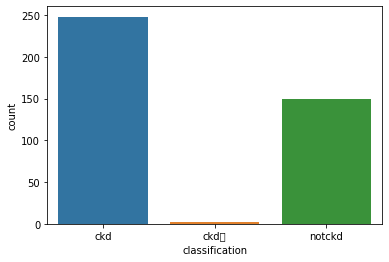

In [11]:

import seaborn as sns

sns.countplot("classification", data = df)

 **6. How many unique values are in label**

In [12]:
df["classification"].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

**7. Count Uncertain value "ckd\t"**

In [13]:
#Search How many 'ckd\t' is present in dataframe
count = 0
for i in df["classification"]:
  if i == "ckd\t":
    count +=1
print(count)

2


**8. Remove that from label and Create a new Dataframe df3**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


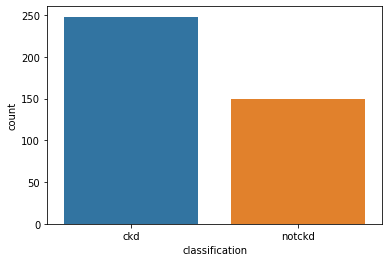

In [14]:
# for i in df["classification"]:
#   if i == "ckd\t":
#     df3 = df.drop(df["classification"])  #df.index[df["classification"]], inplace = True )
df3 = df.copy()
df3.drop(df.index[df["classification"]=="ckd\t"], inplace = True)
sns.countplot("classification", data = df3)

# Application on Clean Dataframe "cleandf"

**1. Create a clean Dataframe by droping missing values and Plot CKD frequency**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


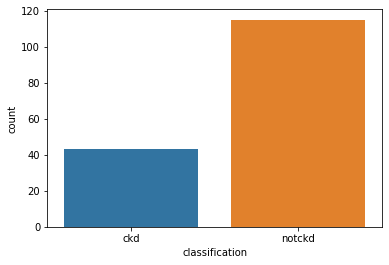

In [15]:
cleandf = df.copy()
cleandf.dropna(axis = 0, inplace = True)
# cleandf.head(3)
sns.countplot("classification", data = cleandf)

**2. Convert every string instances into (Lower Case) to avoid case sensitiveness**

In [16]:
#conver every string instances into lower case to avoid case sensitiveness
cleandf.apply(lambda x: x.str.lower() if (x.dtype == "object") else x)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,60.0,2.7,131.0,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,90.0,4.1,130.0,6.4,5.6,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,148.0,3.9,135.0,5.2,7.7,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


**3. Implementing Label Encoder to Convert features & Labels into Numeric form**

In [17]:
from sklearn.preprocessing import  LabelEncoder
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode
 
    def fit(self,X,y=None):
        return self 
 
    def transform(self,X):
        
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output
 
    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)  
 
#Calling method and passing Dataframe's columns
MultiColumnLabelEncoder(columns = cleandf.columns).fit_transform(cleandf)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,0,29,2,0,4,0,1,0,1,0,36,39,18,0,0,25,11,42,14,1,0,0,1,1,1,0
9,1,34,4,3,2,0,0,0,1,0,0,50,27,1,8,14,8,11,12,1,1,0,1,0,1,0
11,2,43,2,1,3,0,0,0,1,0,75,41,14,8,13,22,11,25,13,1,1,0,1,1,0,0
14,3,47,3,1,3,2,1,0,1,1,56,46,20,7,28,1,0,8,2,1,1,1,1,1,0,0
20,4,41,3,2,2,0,0,0,0,0,58,55,19,12,22,4,4,63,7,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,153,35,3,3,0,0,1,1,0,0,55,33,1,25,20,58,25,42,23,0,0,0,0,0,0,1
396,154,23,2,4,0,0,1,1,0,0,2,16,8,18,6,66,32,52,36,0,0,0,0,0,0,1
397,155,1,3,3,0,0,1,1,0,0,24,11,2,14,15,59,27,41,28,0,0,0,0,0,0,1
398,156,3,1,4,0,0,1,1,0,0,35,34,6,12,20,43,29,47,33,0,0,0,0,0,0,1


**4. Converting All datatype into float64**

In [18]:

#Converting all datatype into float32
cleandf = pd.DataFrame({col: cleandf[col].astype('category').cat.codes.astype('float32') for col in cleandf}, index=cleandf.index)
print(cleandf.dtypes)

id                float32
age               float32
bp                float32
sg                float32
al                float32
su                float32
rbc               float32
pc                float32
pcc               float32
ba                float32
bgr               float32
bu                float32
sc                float32
sod               float32
pot               float32
hemo              float32
pcv               float32
wc                float32
rc                float32
htn               float32
dm                float32
cad               float32
appet             float32
pe                float32
ane               float32
classification    float32
dtype: object


**5. Train Test Split**

In [19]:
#Splitting data into train test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleandf.drop('classification', axis = 1),cleandf['classification'], test_size = 0.33, random_state = 15)


**6. Model Import**

In [20]:
#Importing Classification Models
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

**7. Model Building**

In [21]:
'''                             MODEL BUILDING                             '''
SVCmodel = SVC().fit(X_train, y_train)
MNBmodel = MultinomialNB().fit(X_train, y_train)
GNBmodel = GaussianNB().fit(X_train,y_train)
DTmodel = DecisionTreeClassifier().fit(X_train, y_train)
RFmodel = RandomForestClassifier().fit(X_train, y_train)
LRmodel = LogisticRegression().fit(X_train, y_train)
KNNmodel = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)

**8. Evaluation**

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(">>>>>>>>>>>>>>     Support Vector Machine     <<<<<<<<<<<<")
pred = SVCmodel.predict(X_test)
score = accuracy_score(y_test,pred)
print(score)
conf = confusion_matrix(y_test,pred)
print(conf)
report = classification_report(y_test,pred)
print(report)
print(" ")

print(">>>>>>>>>>>>>>     Multinomial Naive Bayes     <<<<<<<<<<<<")
pred = MNBmodel.predict(X_test)
score = accuracy_score(y_test,pred)
print(score)
conf = confusion_matrix(y_test,pred)
print(conf)
report = classification_report(y_test,pred)
print(report)
print(" ")

print(">>>>>>>>>>>>>>     Gaussian Naive Bayes     <<<<<<<<<<<<")
pred = GNBmodel.predict(X_test)
score = accuracy_score(y_test,pred)
print(score)
conf = confusion_matrix(y_test,pred)
print(conf)
report = classification_report(y_test,pred)
print(report)
print(" ")

print(">>>>>>>>>>>>>>     Decission Tree      <<<<<<<<<<<<")
pred = DTmodel.predict(X_test)
score = accuracy_score(y_test,pred)
print(score)
conf = confusion_matrix(y_test,pred)
print(conf)
report = classification_report(y_test,pred)
print(report)
print(" ")

print(">>>>>>>>>>>>>>     Random Forest     <<<<<<<<<<<<")
pred = RFmodel.predict(X_test)
score = accuracy_score(y_test,pred)
print(score)
conf = confusion_matrix(y_test,pred)
print(conf)
report = classification_report(y_test,pred)
print(report)
print(" ")
print(">>>>>>>>>>>>>>     Logistic Regression     <<<<<<<<<<<<")
pred = LRmodel.predict(X_test)
score = accuracy_score(y_test,pred)
print(score)
conf = confusion_matrix(y_test,pred)
print(conf)
report = classification_report(y_test,pred)
print(report)
print(" ")

>>>>>>>>>>>>>>     Support Vector Machine     <<<<<<<<<<<<
1.0
[[15  0]
 [ 0 38]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        38

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

 
>>>>>>>>>>>>>>     Multinomial Naive Bayes     <<<<<<<<<<<<
1.0
[[15  0]
 [ 0 38]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        38

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

 
>>>>>>>>>>>>>>     Gaussian Naive Bayes     <<<<<<<<<<<<
1.0
[[15  0]
 [ 0 38]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.0

***100% Accuracy***